# Ego clustering

By comparing the mental models of egos we determine how similar they are amongst each other.

In [1]:
import csv
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# a dictionary, keys will be egos, values will
# be networks that represent their mental models
mmodel = {}

# All mental models for Xochimilco are merged
# in a single CSV file
with open('maps_merged.csv') as f:
    reader = csv.reader(f)

    # each row contains edges for each ego
    for row in reader:
        ego, s, t = row
        
        if ego not in mmodel:
            mmodel[ego] = nx.DiGraph()

            
        mmodel[ego].add_edge(s, t)

ValueError: need more than 1 value to unpack

Mental-model networks are loaded into this dictionary.

In [2]:
mmodel.keys()

dict_keys(['X051615_GOV', 'sangregorio', 'zonacerril', 'X050615a_GOV', 'X052515_OTR', 'X042315_GOV_2', 'X022415_GOV', 'X050715b_GOV', 'X011915_GOV', 'X050715a_GOV', 'X050115_GOV', 'X050615b_GOV', 'pescadores'])

## Jaccard Index

The Jaccard coefficient measures similarity between sets, and is defined as the size of the intersection divided by the size of the union of the sample sets.

In [3]:
def jaccard_index(first, *others):
    """ Computes jaccard index """
    return float(len(first.intersection(*others))) \
            / float(len(first.union(*others)))

## Pairwise comparisons

We will compute a Jaccard Index of similarity between the mental models of each pair of egos.

In [8]:
from itertools import combinations
    
jinxes = {pair: jaccard_index(set(mmodel[pair[0]].edges()),
                              set(mmodel[pair[1]].edges()))
          for pair in combinations(mmodel.keys(), 2)}    

# any pair yields a number between 0 and 1
jinxes[('sangregorio', 'pescadores')]

0.04878048780487805

## Clustering and heatmap

All egos seem very different judging by their mental models.

In [10]:
import pandas as pd
import seaborn as sns

# turn the dictionary of pairs into a matrix
rows = []
for i in sorted(mmodel.keys()):
    row = []
    for j in sorted(mmodel.keys()):
        row.append(jinxes.get((i, j), jinxes.get((j, i), 1)))
    rows.append(row)

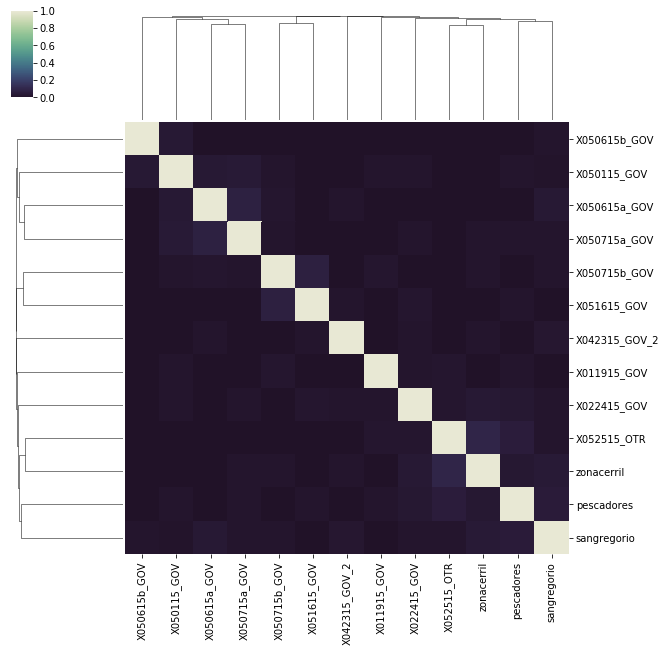

In [13]:
# create a dataframe from 'rows' matrix
df = pd.DataFrame(data=rows, columns=sorted(mmodel.keys()))

# setup a colormap
cmap = sns.cubehelix_palette(3, start=0.5, rot=-.75,
                             dark=0.1, light=0.9,
                             reverse=True, as_cmap=True)
# create plot
cg = sns.clustermap(df, standard_scale=1, cmap=cmap,
                            yticklabels=sorted(mmodel.keys()))